# Introduction

Based on Wikipedia, a large language model (LLM) is a type of language model known for its substantial size, achieved through AI accelerators-based preprocessing of vast amounts of text data, primarily scraped from the Internet. However, LLMs have limitations in understanding specific contexts due to their training in general knowledge. To overcome this limitation, we can introduce extra documents or context. This assists the LLM in generating responses enriched with insights from those supplementary materials. These sources might be databases, PDFs, plain text files, or data from websites.

# Objective

Our goal is to establish a Question-Answer System using the Large Language Model (LLM). We will utilize documents extracted from "Tripadvisor Hotel Reviews" to feed the LLM. First, we will examine its information, clean the review column, and then save the clean database as a CSV file. Then, we will connect a database to the LLM, aiming to construct a Question-Answer System. This system is intended to offer pertinent answers to specific business-related inquiries. 

# Source

The source of information consists of structured data in the form of a CSV file titled "Tripadvisor Hotel Review," provided by Algortima. This document pertains to customer reviews based on their experiences during hotel stays. These reviews also include customer ratings, adding an evaluative aspect to the feedback.

# Exploratory Data Analysis 

## Import Libraries 

First, we need to import several libraries such as `numpy`, `pandas`, `matplotlib`, `seaborn`, `worldcloud`, and `textblob` to be used to check, manipulate and clean the database. 

In [165]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Text Data
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
import string

## Read database

We can read the content of our file by using `pd.read_csv` function and assign it as `review`. Based on the result, the database consists of two (2) columns of the Review and Rating of the Hotel. 

In [166]:
review = pd.read_csv("tripadvisor_hotel_reviews.csv")

review.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


We can also check the information in the dataset by using `review.info()`. 

In [167]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [168]:
review['Rating'].unique()

array([4, 2, 3, 5, 1])

In [169]:
review['Rating'].value_counts(normalize=True) * 100

Rating
5    44.185252
4    29.471475
3    10.658338
2     8.750183
1     6.934752
Name: proportion, dtype: float64

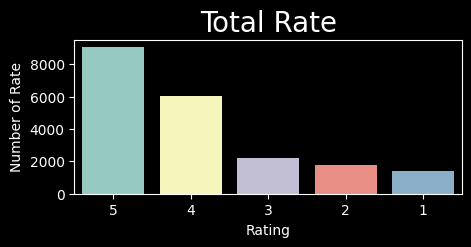

In [170]:
fig_dims = (5,2)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Rating',
              data = review,
              ax=ax, 
              order = review['Rating'].value_counts().index)
y_r_rating = list(review['Rating'].value_counts()[0:10])
x_r_rating = list(review['Rating'].value_counts().index[0:10])
plt.xlabel("Rating")
plt.ylabel("Number of Rate")

plt.title('Total Rate',fontdict={'fontsize':20})
plt.show()

Insight : 

- The data has 20,491 reviews
- No missing values
- The datatypes for both columns are correct. 
- The rating value column ranges from 1 to 5 which 1 being the lowest as opposed to 5.
- Based on the bar chart and table below, more than 44% of customers gave a rating of 5 in this Hotel.
- And only a total of 15% of customers gave rating 1 and 2.  

We can see for below code that the database does not have duplicates. 

In [172]:
review.drop_duplicates(subset='Review', inplace=True, keep='first')
review.shape

(20491, 2)

# Cleaning the database

Now, let's check the `review` column. As seen in the below result that some words used in this column are not following standard rules, example: `didn't`, `n't`, `4*` and etc. Thus we need to clean it. 

In [173]:
review['Review'].values[2:4]

array(["nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat

First, we need to create a function to eliminate several unnecessary syntaxes and applied it to our `review` column. Then, assign it as `review_new`

In [174]:
def text_clean(text):
    # case folding
    text = text.lower()
    
    ## Decontract text            
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"did\'t", "did not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\’w", " with", text)
 
    
    # remove all puctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # text = re.sub('\w*\d\w*', '', text) #remove digit/number
    
    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    
    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

In [175]:
review_new = pd.DataFrame()
review_new['clean_Review'] = review['Review'].apply(lambda x: text_clean(x))

Now, let's compare before and after transformation. Some of the word are replaced and changed as per function. 

In [176]:
review.loc[2,'Review']

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

In [177]:
review_new.loc[2,'clean_Review']

'nice rooms not 4 experience hotel monaco seattle good hotel not 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did not provide guidance special requeststv hard use ipod sound dock suite non functioning decided book mediterranean suite 3 night weekend stay 1st choice rest party filled comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price 53 tip reasonable driver waiting arrivalcheckin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did not stay night got 121a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointingin morning way asked desk check thermostat said 65f 74 2 degrees w

## Save it to CSV file

Before we save the file, we need to ensure that all columns are available in those new file. As result below, only column `clean_Review` is available. Thus, we need to add the `Rating` column in the dataframe by using `join`. 

In [178]:
review_new.head()

,clean_Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4 experience hotel monaco seatt...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...


In [179]:
review_clean = review_new.join(review["Rating"])

In [180]:
review_clean.head()

,clean_Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


Now, we save it as csv file and assign it as `review_clean.csv` by using function `to_csv`

In [181]:
review_clean.to_csv("review_clean.csv")

## Word Cloud 

Let's show the most common word that appeared in the positive and negative reviews. We will assume that reviews with 4 and 5 Ratings are categorized as positive reviews and assigned as review_clean_positive and reviews with 1 and 2 ratings are categorized as negative reviews and assigned as review_clean_negative. First, we need to do conditional subsetting. 



In [133]:
# Positive review with 4 and 5 rating
review_clean_positive = review_clean[(review_clean['Rating'] == 4) | (review_clean['Rating'] == 5)]

# Positive review with 1 and 2 rating
review_clean_negative = review_clean[(review_clean['Rating'] == 1) | (review_clean['Rating'] == 2)]

We use the `clean_Review` as the input for the Word Cloud with three steps, which are extracting the review (text document), creating and generating a Word Cloud image and displaying the cloud using matplotlib

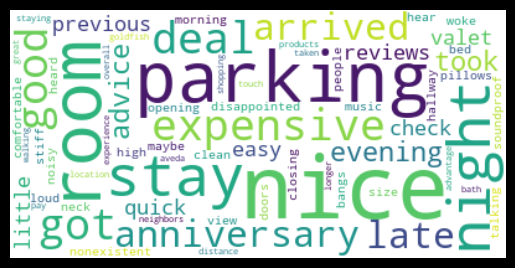

In [134]:
# Start with one review:
text = review_clean_positive.clean_Review[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hotel"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_font_size=70, max_words=500).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


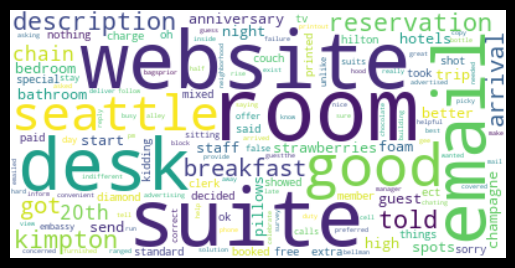

In [135]:
# Start with one review:
text = review_clean_negative.clean_Review[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hotel"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_font_size=70, max_words=500).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Build Question Answering System

## Environment Set-Up 

now, let's get to the real assignment. First, we need to set up our environment : 
- Set API key by login to our account and generating API key specific for the project.
- Create .env file and save our API key in the .env file.
- Place the .env file in the same folder with our database 
- Load the environment variable from .env file into Python by using the statement `from dotenv import load_dotenv`





In [148]:
from dotenv import load_dotenv

load_dotenv()

True

## Langchain Set-up

Second, we connect the LangChain library with the LLM. In here, we use `OpenAI` as the source.  

- Import the required module using the statement `from langchain import OpenAI`.
- Create an OpenAI instance and assign it as `llm`.
- Set the temperature parameter which controls the randomness of the output of the language models. We set the `temperature = 0.2` because we want the output to be focused.

In [149]:
from langchain import OpenAI

llm = OpenAI(temperature=0.2)

## Connecting to Database

Let's define the file path of our dataset `review_clean.csv`

In [150]:
filepath = "review_clean.csv"

Next, we will create an agent specifically designed for working with CSV data. This agent will allow us to query and retrieve information from the rice.csv dataset. 

In [151]:
from langchain.agents import create_csv_agent

agent = create_csv_agent(llm, filepath, verbose=True)

From here, we can make conversation and ask specific question related to our data by using `agent.run`. Here are the examples 

In [152]:
agent.run("Tell me about this database and can you make summary of our dataframe")



> Entering new  chain...
Thought: I need to get an overview of the dataframe
Action: python_repl_ast
Action Input: df.describe()
Observation:          Unnamed: 0        Rating
count  20491.000000  20491.000000
mean   10245.000000      3.952223
std     5915.386519      1.233030
min        0.000000      1.000000
25%     5122.500000      3.000000
50%    10245.000000      4.000000
75%    15367.500000      5.000000
max    20490.000000      5.000000
Thought: I now know the final answer
Final Answer: The dataframe contains 20491 rows and 2 columns, with the average rating being 3.95. The minimum rating is 1 and the maximum rating is 5.

> Finished chain.


'The dataframe contains 20491 rows and 2 columns, with the average rating being 3.95. The minimum rating is 1 and the maximum rating is 5.'

In [153]:
agent.run("Based on the review, do you know what is the name of hotel and location?")



> Entering new  chain...
Thought: I need to look for clues in the review
Action: python_repl_ast
Action Input: df['clean_Review'].str.contains('hotel')
Observation: 0         True
1         True
2         True
3         True
4         True
         ...  
20486    False
20487     True
20488     True
20489     True
20490     True
Name: clean_Review, Length: 20491, dtype: bool
Thought: I need to look for the name of the hotel
Action: python_repl_ast
Action Input: df['clean_Review'].str.contains('monaco')
Observation: 0        False
1        False
2         True
3         True
4        False
         ...  
20486    False
20487    False
20488    False
20489    False
20490    False
Name: clean_Review, Length: 20491, dtype: bool
Thought: I need to look for the location of the hotel
Action: python_repl_ast
Action Input: df['clean_Review'].str.contains('Seattle')
Observation: 0        False
1        False
2        False
3        False
4        False
         ...  
20486    False
20487    Fals

'The hotel is called Hotel Monaco and it is located in Seattle.'

In [154]:
agent.run("How much each proportion of each rating given in this reviews, Please make it in percentage")



> Entering new  chain...
Thought: I need to calculate the proportion of each rating
Action: python_repl_ast
Action Input: df['Rating'].value_counts(normalize=True)*100
Observation: Rating
5    44.185252
4    29.471475
3    10.658338
2     8.750183
1     6.934752
Name: proportion, dtype: float64
Thought: I now know the final answer
Final Answer: Rating 5: 44.19%, Rating 4: 29.47%, Rating 3: 10.66%, Rating 2: 8.75%, Rating 1: 6.93%

> Finished chain.


'Rating 5: 44.19%, Rating 4: 29.47%, Rating 3: 10.66%, Rating 2: 8.75%, Rating 1: 6.93%'

In [160]:
agent.run("Can you give me 2 reason why did people give rating of 5 or rating of 4")



> Entering new  chain...
Thought: I should look at the reviews and see what people said
Action: python_repl_ast
Action Input: df[df['Rating'] == 5]['clean_Review'].head(2)
Observation: 3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: clean_Review, dtype: object
Thought: I should look at the reviews and see what people said
Action: python_repl_ast
Action Input: df[df['Rating'] == 4]['clean_Review'].head(2)
Observation: 0    nice hotel expensive parking got good deal sta...
7    excellent staff housekeeping quality hotel cho...
Name: clean_Review, dtype: object
Thought: I now know the final answer
Final Answer: People gave a rating of 5 or 4 because they enjoyed the hotel's amenities (e.g. free breakfast, free wine/coffee/tea service, pet friendly rooms, etc.), the staff was friendly and helpful, and the location was convenient.

> Finished chain.


"People gave a rating of 5 or 4 because they enjoyed the hotel's amenities (e.g. free breakfast, free wine/coffee/tea service, pet friendly rooms, etc.), the staff was friendly and helpful, and the location was convenient."

In [156]:
agent.run("Why did people give rating 1 or 2")



> Entering new  chain...
Thought: I should look at the reviews to see why people gave a low rating
Action: python_repl_ast
Action Input: df[df['Rating'] <= 2]['clean_Review']
Observation: 1        ok nothing special charge diamond member hilto...
10       poor value stayed monaco seattle july nice hot...
15       horrible customer service hotel stay february ...
16       disappointed say anticipating stay hotel monac...
24       great location need internally upgrade advanta...
                               ...                        
20484    deceptive staff deceptive desk staff claiming ...
20485    not impressed unfriendly staff checked asked h...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca not believe excellent rating...
Name: clean_Review, Length: 3214, dtype: object
Thought: People gave low ratings because of poor customer service, bad value for money, and deceptive staff.
Fina

'People gave low ratings because of poor customer service, bad value for money, and deceptive staff.'

In [157]:
agent.run("Which one of these reasons is the most appear in the review with rating 1 or 2 : poor customer service, false advertising, and lack of amenities.")



> Entering new  chain...
Thought: I should look for keywords in the reviews
Action: python_repl_ast
Action Input: df[df['Rating'] <= 2]['clean_Review'].str.contains('poor customer service|false advertising|lack of amenities').sum()
Observation: 15
Thought: I now know the final answer
Final Answer: 15 reviews mention poor customer service, false advertising, or lack of amenities.

> Finished chain.


'15 reviews mention poor customer service, false advertising, or lack of amenities.'

In [158]:
agent.run("Can you give me a detail cases about poor customer service based on the review and make summary for each case?")



> Entering new  chain...
Thought: I should look for reviews that mention poor customer service
Action: python_repl_ast
Action Input: df[df['clean_Review'].str.contains('poor customer service')]
Observation:        Unnamed: 0                                       clean_Review  Rating
2033         2033  not worthy doubletree relatively minute trip n...       1
3912         3912  poor customer service poor customer service no...       1
7669         7669  bryant park needs work service bryant park hot...       2
8515         8515  great location poor customer service booked da...       1
11859       11859  poor service average room poor customer servic...       2
15655       15655  lesson compromise stayed ritz carlton based ex...       1
15717       15717  poor customer service stayed leg 3week journey...       2
16470       16470  case study poor customer service husband recen...       2
17907       17907  style substance dreadful mistakes booking good...       2
18596       18596  3 

"The reviews mentioned poor customer service include: \n1. Not worthy of a Doubletree, with a relatively short trip not being worth the cost. \n2. Poor customer service, with no help from the staff. \n3. Bryant Park needs work in terms of customer service, with hotel staff being unhelpful. \n4. Great location but poor customer service, with a booking not being honored. \n5. Poor service and an average room, with customer service being unhelpful. \n6. A lesson in compromise, with a stay at the Ritz Carlton not being up to expectations. \n7. Poor customer service, with a 3 week journey not being enjoyable. \n8. A case study in poor customer service, with a husband's recent stay not being satisfactory. \n9. Style over substance, with booking mistakes and poor customer service. \n10. A trip for 3 late 20s/early 30s couples, with customer service being unhelpful."

# Summary 

In this study, we've thoroughly examined our dataset, "Tripadvisor Hotel Review," which contains both the reviews and ratings of the hotel. Firstly, we cleaned the words within the review column and then stored this refined data in a CSV file. This CSV file serves as our dataset, which we subsequently fed into the Large Language Model (LLM) known as GPT. To establish a connection between the LLM and the database for question answering, we utilized LangChain.

From the results obtained, the following conclusions can be drawn:
- The reviews is related to Hotel Monaco in Seattle.
- These reviews indicate that over 50% of the customers had positive experiences during their stay. The reasons for this positivity include the hotel's diverse amenities (such as complimentary breakfast, free wine/coffee/tea service, pet-friendly rooms, etc.), the friendly staff, and the convenient location.
- Conversely, a segment of customers (15%) expressed negative sentiments. This negativity was attributed to poor customer service, perceived poor value for money, and encounters with deceptive staff.

Overall, this method has proven to be highly valuable and intriguing, offering a swift analysis process with minimal coding required. It efficiently highlights crucial aspects that can aid hotel or business owners in enhancing their performance or addressing challenges. When combined with machine learning, this approach substantially streamlines decision-making processes, making them both more straightforward and faster.

